In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ftone = 0.09
fnyquist = 0.5

In [3]:
fharm = np.arange(1, np.floor(fnyquist/ftone)+1)*ftone

In [4]:
fharm

array([0.09, 0.18, 0.27, 0.36, 0.45])

In [5]:
coeff_dc = np.array([1.0])
for f in fharm:
    coeff_dc = np.convolve(
        coeff_dc,
        [-1.0, -1.0] if f == fnyquist else [1.0, -2*np.cos(2*np.pi*f), 1.0])

In [6]:
coeff_dc

array([1.        , 0.88741305, 0.95234314, 0.90368884, 0.94512082,
       0.90662245, 0.94512082, 0.90368884, 0.95234314, 0.88741305,
       1.        ])

In [7]:
coeff_dc /= coeff_dc.sum()

In [8]:
coeff_dc

array([0.09724075, 0.08629271, 0.09260656, 0.08787538, 0.09190426,
       0.08816065, 0.09190426, 0.08787538, 0.09260656, 0.08629271,
       0.09724075])

In [9]:
dly1st = np.floor(1.0/ftone - 0.5*len(coeff_dc))+1

In [10]:
dly1st

6.0

In [11]:
dly = np.arange(dly1st, dly1st+len(coeff_dc))

In [12]:
dly

array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.])

In [13]:
coeff_phase = dly[None,:]*fharm[:,None]

In [14]:
coeff_phase

array([[0.54, 0.63, 0.72, 0.81, 0.9 , 0.99, 1.08, 1.17, 1.26, 1.35, 1.44],
       [1.08, 1.26, 1.44, 1.62, 1.8 , 1.98, 2.16, 2.34, 2.52, 2.7 , 2.88],
       [1.62, 1.89, 2.16, 2.43, 2.7 , 2.97, 3.24, 3.51, 3.78, 4.05, 4.32],
       [2.16, 2.52, 2.88, 3.24, 3.6 , 3.96, 4.32, 4.68, 5.04, 5.4 , 5.76],
       [2.7 , 3.15, 3.6 , 4.05, 4.5 , 4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 ]])

In [15]:
coeff = 2*np.cos(2*np.pi*coeff_phase)*coeff_dc[None,:]

In [16]:
coeff

array([[-1.88371513e-01, -1.18142854e-01, -3.47054794e-02,
         6.46981727e-02,  1.48704218e-01,  1.75973371e-01,
         1.61072635e-01,  8.46685780e-02, -1.16296285e-02,
        -1.01443168e-01, -1.80824332e-01],
       [ 1.70425443e-01, -1.08367286e-02, -1.72206811e-01,
        -1.28116796e-01,  5.67999569e-02,  1.74930954e-01,
         9.84895311e-02, -9.41719704e-02, -1.83752667e-01,
        -5.33318296e-02,  1.41770917e-01],
       [-1.41770917e-01,  1.32979356e-01,  9.92421567e-02,
        -1.59024049e-01, -5.67999569e-02,  1.73198165e-01,
         1.15414326e-02, -1.75403963e-01,  3.47054794e-02,
         1.64138494e-01, -8.28061981e-02],
       [ 1.04208402e-01, -1.71224538e-01,  1.35014560e-01,
         1.10354820e-02, -1.48704218e-01,  1.70781842e-01,
        -7.82618622e-02, -7.48310373e-02,  1.79394317e-01,
        -1.39624543e-01,  1.22115948e-02],
       [-6.00980907e-02,  1.01443168e-01, -1.49840568e-01,
         1.67148913e-01, -1.83808522e-01,  1.67691522e-01,
  

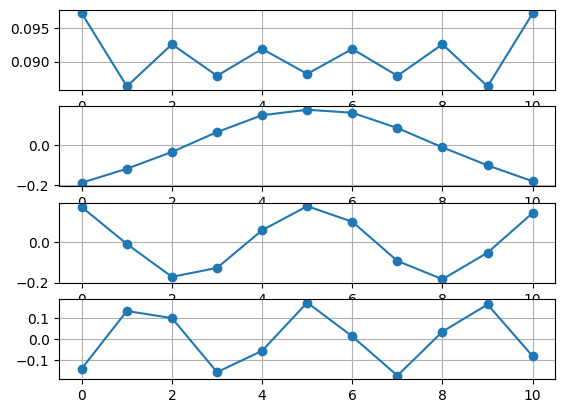

In [17]:
fig, ax = plt.subplots(4)
ax[0].plot(coeff_dc, "o-")
ax[1].plot(coeff[0], "o-")
ax[2].plot(coeff[1], "o-")
ax[3].plot(coeff[2], "o-")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

In [18]:
ftest = np.arange(0, 0.5, 0.1*ftone)

In [19]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(coeff_dc))[None, :]
                *ftest[:, None])
         *coeff_dc[None,:]).sum(axis=1)

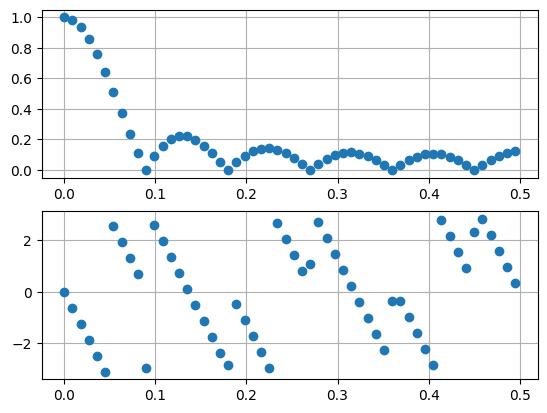

In [20]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()

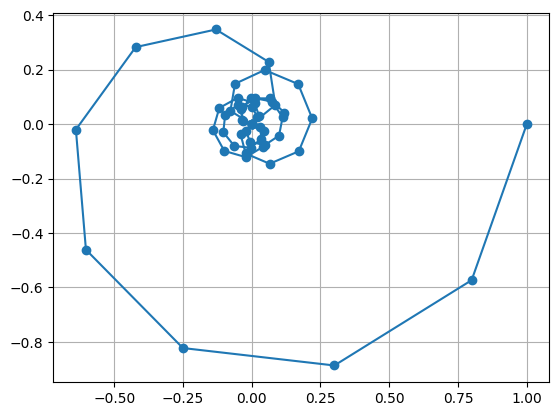

In [21]:
fig, ax = plt.subplots(1)
ax.plot(np.real(transf), np.imag(transf), "o-")
ax.grid()

In [22]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(coeff_dc))[None, :]
                *ftest[:, None])
         *coeff[None,0]).sum(axis=1)

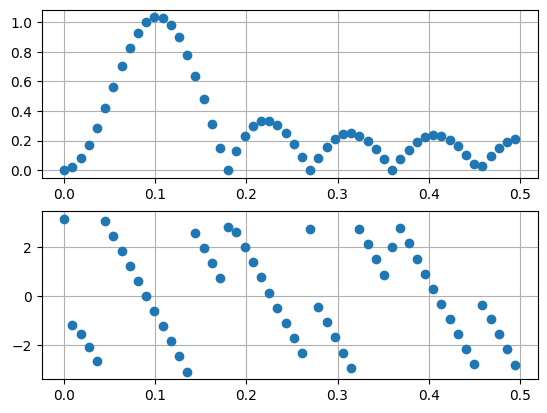

In [23]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()

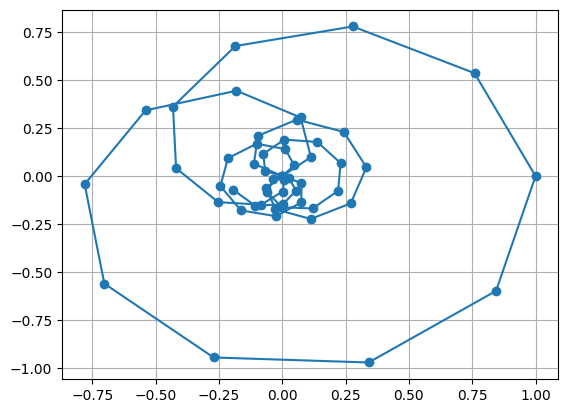

In [24]:
fig, ax = plt.subplots(1)
ax.plot(np.real(transf), np.imag(transf), "o-")
ax.grid()

In [25]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(coeff_dc))[None, :]
                *ftest[:, None])
         *coeff[None,1]).sum(axis=1)

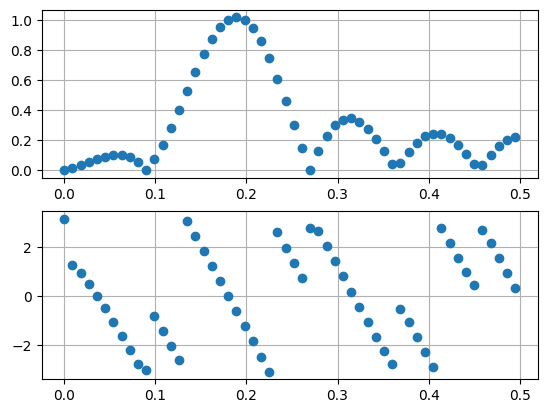

In [26]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()

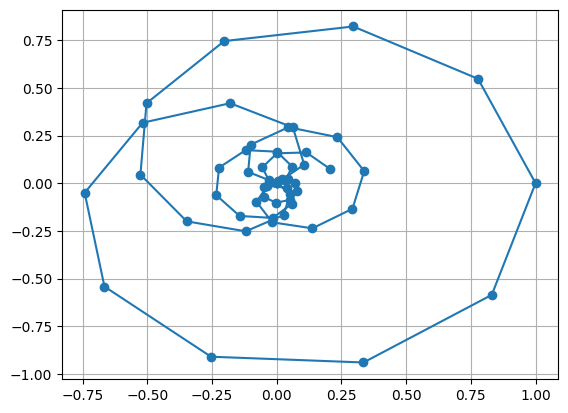

In [27]:
fig, ax = plt.subplots(1)
ax.plot(np.real(transf), np.imag(transf), "o-")
ax.grid()

In [28]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(coeff_dc))[None, :]
                *ftest[:, None])
         *coeff[0:2].sum(axis=0)[None,:]).sum(axis=1)

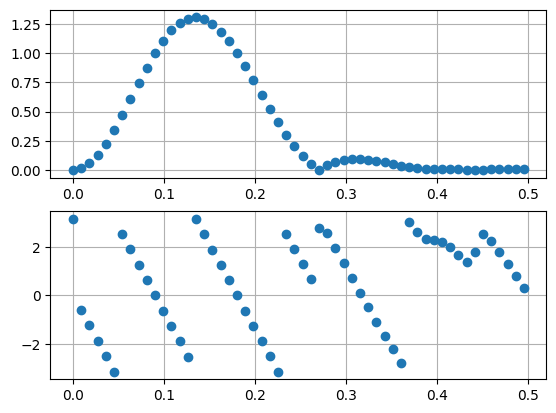

In [29]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()

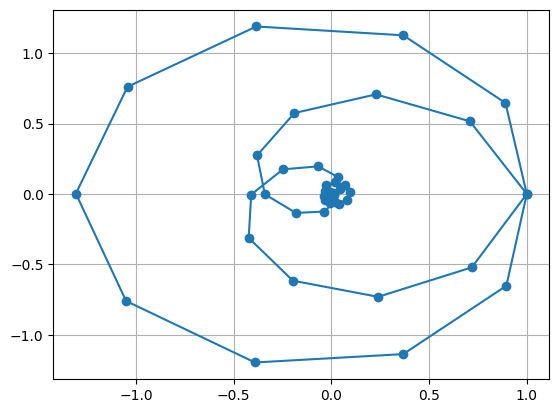

In [30]:
fig, ax = plt.subplots(1)
ax.plot(np.real(transf), np.imag(transf), "o-")
ax.grid()

In [31]:
transf = (np.exp(-2j*np.pi*np.arange(dly1st, dly1st+len(coeff_dc))[None, :]
                *ftest[:, None])
         *(coeff[0:2].sum(axis=0)+0.98*coeff_dc)[None,:]).sum(axis=1)

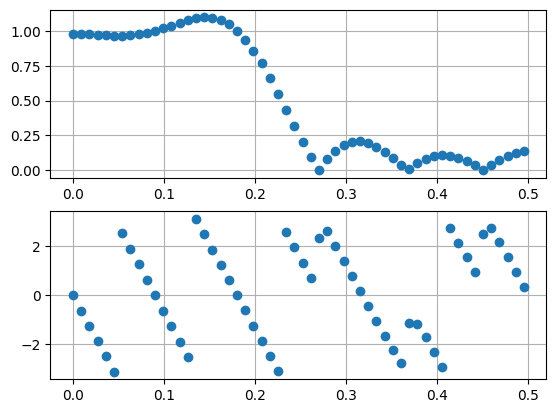

In [32]:
fig, ax = plt.subplots(2)
ax[0].plot(ftest, np.abs(transf), "o")
ax[1].plot(ftest, np.angle(transf), "o")
ax[0].grid()
ax[1].grid()

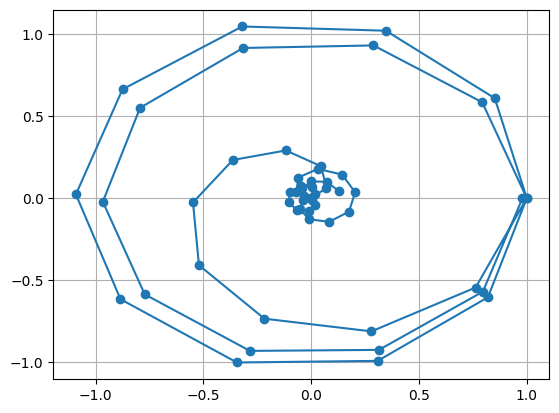

In [33]:
fig, ax = plt.subplots(1)
ax.plot(np.real(transf), np.imag(transf), "o-")
ax.grid()

In [34]:
transf

array([ 9.80000000e-01+0.00000000e+00j,  7.96066484e-01-5.70045988e-01j,
        3.13981847e-01-9.24822957e-01j, -2.83873397e-01-9.30883212e-01j,
       -7.71990689e-01-5.86618631e-01j, -9.66610183e-01-2.19409541e-02j,
       -7.93755499e-01+5.50831976e-01j, -3.16225554e-01+9.15448760e-01j,
        2.88804889e-01+9.31000801e-01j,  7.93055604e-01+5.84690058e-01j,
        1.00000000e+00-1.97758476e-16j,  8.19635113e-01-6.04090005e-01j,
        3.08262949e-01-9.91772805e-01j, -3.44802068e-01-1.00156221e+00j,
       -8.84665582e-01-6.15777465e-01j, -1.09153004e+00+2.31228200e-02j,
       -8.75207846e-01+6.63290480e-01j, -3.19997932e-01+1.04646925e+00j,
        3.46320820e-01+1.02065352e+00j,  8.51202649e-01+6.09258652e-01j,
        1.00000000e+00+1.31838984e-16j,  7.62575522e-01-5.44647148e-01j,
        2.79226894e-01-8.11958949e-01j, -2.17191063e-01-7.34634894e-01j,
       -5.20699986e-01-4.08488160e-01j, -5.48418218e-01-2.60959071e-02j,
       -3.63400589e-01+2.32798277e-01j, -1.17519379